In [1]:
#1
import pandas as pd
import numpy as np
file_path='En_In.xls'
df = pd.read_excel(file_path)
df = df.iloc[:, 2:]
df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

In [2]:
#2
df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce')
df['Energy Supply'] = df['Energy Supply'] * 1000000
df['Energy Supply per Capita'] = df['Energy Supply per Capita'].replace('...', np.nan)

In [3]:
#3
country_rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

In [4]:
#4
df['Country'] = df['Country'].str.replace(r"\(.*\)|\d+", "", regex=True)
df['Country'] = df['Country'].replace(country_rename_dict)
df['Country'] = df['Country'].str.strip()

In [5]:
df.loc[df['Country'].isin(['American Samoa', 'Bolivia', 'South Korea'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
20,American Samoa,NaN,NaN,0.641026
41,Bolivia,3.360000e+08,32,31.47712
181,South Korea,1.100700e+10,221,2.279353


In [6]:
# 5
file_path = 'gpd.csv'
columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + list (range(1960, 2016))
gdp_data = pd.read_csv(file_path, header=None, names=columns, skiprows=5)
renaming_countries = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp_data['Country'] = gdp_data['Country'].replace(renaming_countries)

In [7]:
gdp_data.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [8]:
#6
file_path = 'scimagojr.xlsx'
scimago_data = pd.read_excel(file_path)

In [9]:
#7 
best_country = scimago_data[scimago_data['Rank'] <= 15].reset_index(drop=True)
best_country [['Rank', 'Country']]
energy_data_file = 'En_In.xls'
energy_data = pd.read_excel(energy_data_file).iloc[:, 2:]
energy_data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy_data['Energy Supply'] = pd.to_numeric(energy_data['Energy Supply'], errors='coerce') * 1_000_000
energy_data['Country'] = energy_data['Country'].str.replace(r"\(.*\)|\d+", "", regex=True).str.strip()
country_rename = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy_data['Country'] = energy_data['Country'].replace(country_rename)
gdp_file = 'gpd.csv'
columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(range(1960, 2016))
gdp_data = pd.read_csv(gdp_file, header=None, names=columns, skiprows=4)
gdp_data['Country'] = gdp_data['Country'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})
gdp_data_filtered = gdp_data[['Country'] + list(range(2006, 2016))]
merged_data = pd.merge(best_country, energy_data, on='Country', how='inner')
merged_data = pd.merge(merged_data, gdp_data_filtered, on='Country', how='inner')
final_result = merged_data.set_index('Country')
final_result = final_result[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]]

In [10]:
final_result.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.94543,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.90153,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.96908,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.02028,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [11]:
final_result.shape

(15, 20)

In [12]:
# 8
def calculate_average_gdp():
    years = list(range(2006, 2016))
    avg_gdp = final_result[years].mean(axis=1).sort_values(ascending=False) 
    return avg_gdp

In [13]:
calculate_average_gdp()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [14]:
# 9
def gdp_change_for_5th_country():
    avg_gdp = calculate_average_gdp()
    fifth_country = avg_gdp.index[4]
    gdp_2006 = final_result.loc[fifth_country, 2006]
    gdp_2015 = final_result.loc[fifth_country, 2015]
    gdp_change = gdp_2015 - gdp_2006
    return (fifth_country, gdp_change)

In [15]:
gdp_change_for_5th_country()

('France', 153345695364.24023)

In [16]:
# 10
def max_renewable_energy():
    final_result['% Renewable'] = pd.to_numeric(final_result['% Renewable'], errors='coerce')
    max_renewable = final_result['% Renewable'].idxmax()
    max_percentage = final_result.loc[max_renewable, '% Renewable']
    return (max_renewable, max_percentage)

In [17]:
max_renewable_energy()

('Brazil', 69.64803)

In [18]:
# 11
def sixth_largest_population():
    final_result['Estimated Population'] = final_result['Energy Supply'] / final_result['Energy Supply per Capita']
    sorted_population = final_result['Estimated Population'].sort_values(ascending=False)
    sixth_country = sorted_population.index[5]
    sixth_population = sorted_population.iloc[5]
    return (sixth_country, sixth_population)

In [19]:
sixth_largest_population()

('Japan', 127409395.97315437)

In [20]:
# 12
def correlation_citations_energy():
    final_result['Population Estimate'] = final_result['Energy Supply'] / final_result['Energy Supply per Capita']
    final_result['Citations per Capita'] = final_result['Citable documents'] / final_result['Population Estimate']
    final_result['Citations per Capita'] = pd.to_numeric(final_result['Citations per Capita'], errors='coerce')
    final_result['Energy Supply per Capita'] = pd.to_numeric(final_result['Energy Supply per Capita'], errors='coerce')
    correlation = final_result['Citations per Capita'].corr(final_result['Energy Supply per Capita'])  
    return correlation

In [21]:
correlation_citations_energy()

0.7940010435442946

In [22]:
# 13
def renewable_above_median():
    median_renewable = final_result['% Renewable'].median()
    final_result['Above Median Renewable'] = (final_result['% Renewable'] >= median_renewable).astype(int)
    result_series = final_result['Above Median Renewable'].sort_values(ascending=True, key=lambda x: final_result['Rank'])
    result_series.name = None
    return result_series

In [23]:
renewable_above_median()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
dtype: int32

In [24]:
# 14
def group_by_continent():
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }
    final_result['Continent'] = final_result.index.map(ContinentDict)
    stats = final_result.groupby('Continent')['Population Estimate'].agg(
        size='count',
        sum='sum',
        mean='mean',
        std='std'
    )
    return stats

In [25]:
group_by_continent()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,5.797333e+08,6.790979e+08
Australia,1,23316017.316017,2.331602e+07,NaN
Europe,6,457929667.216372,7.632161e+07,3.464767e+07
North America,2,352855249.48025,1.764276e+08,1.996696e+08
South America,1,205915254.237288,2.059153e+08,NaN


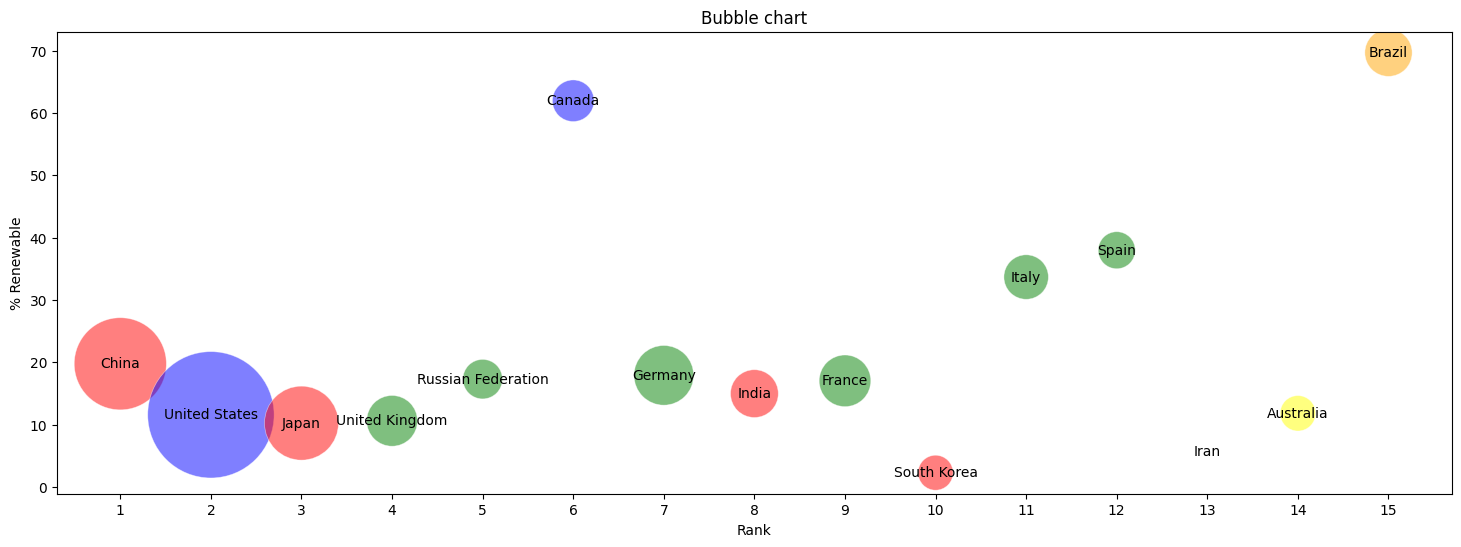

In [26]:
import matplotlib.pyplot as plt
continent_mapping = {
    'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 
    'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 
    'Canada': 'North America', 'Germany': 'Europe', 'India': 'Asia',
    'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe', 
    'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia', 
    'Brazil': 'South America'
}
final_result['Continent'] = final_result.index.map(continent_mapping)
continent_colors = {
    'Asia': 'red', 'North America': 'blue', 'Europe': 'green', 
    'Australia': 'yellow', 'South America': 'orange'
}
plt.figure(figsize=(18, 6))
plt.scatter(
    x=final_result['Rank'],
    y=final_result['% Renewable'],
    s=final_result[2015] / 2e9,
    c=final_result['Continent'].map(continent_colors),
    alpha=0.5, edgecolors="w", linewidth=0.5
)
for i, country in enumerate(final_result.index):
    plt.text(
        final_result['Rank'][i],
        final_result['% Renewable'][i],
        country,
        ha='center', va='center', fontsize=10, color='black'
    )
plt.xticks(ticks=range(1, 16))
plt.xlabel('Rank')
plt.ylabel('% Renewable')
plt.title('Bubble chart')
plt.show()